# <span style = "color: green" >Gold price prediction - Simple linear regression</span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd 


#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df=pd.read_csv('gold_price_USD.csv')

In [3]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


In [4]:
df.tail()

,Date,USD (AM)
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55
4717,2019-09-02,1523.35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### View the first 5 rows

#### Check the information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [8]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [9]:
df.rename(columns ={'USD (AM)': 'Price'},inplace = True )

In [10]:
# the column dat will be convrted to datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# extracting year, date and month 
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [12]:
df.head()

,Date,Price,Day,Month,Year
0,2001-01-02,272.80,2,1,2001
1,2001-01-03,269.00,3,1,2001
2,2001-01-04,268.75,4,1,2001
3,2001-01-05,268.00,5,1,2001
4,2001-01-08,268.60,8,1,2001


#### Check if there are any missing values in the dataset

In [13]:
df.isnull().sum()

Date     0
Price    0
Day      0
Month    0
Year     0
dtype: int64

#### Gather the basic statistical information about the dataset

In [14]:
df.describe()

,Price,Day,Month,Year
count,4718.000000,4718.000000,4718.000000,4718.000000
mean,959.990812,15.672107,6.456761,2009.839339
std,449.456217,8.711178,3.426217,5.392467
min,256.700000,1.000000,1.000000,2001.000000
25%,449.112500,8.000000,3.000000,2005.000000
50%,1113.125000,16.000000,6.000000,2010.000000
75%,1293.750000,23.000000,9.000000,2014.750000
max,1896.500000,31.000000,12.000000,2019.000000


In [18]:
df.head()

,Date,Price,Day,Month,Year
0,2001-01-02,272.80,2,1,2001
1,2001-01-03,269.00,3,1,2001
2,2001-01-04,268.75,4,1,2001
3,2001-01-05,268.00,5,1,2001
4,2001-01-08,268.60,8,1,2001


#### See all the years and Months in our dataset

In [20]:
df["Year"].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [22]:
df["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

In [23]:
import matplotlib.pyplot as plt
import numpy as np

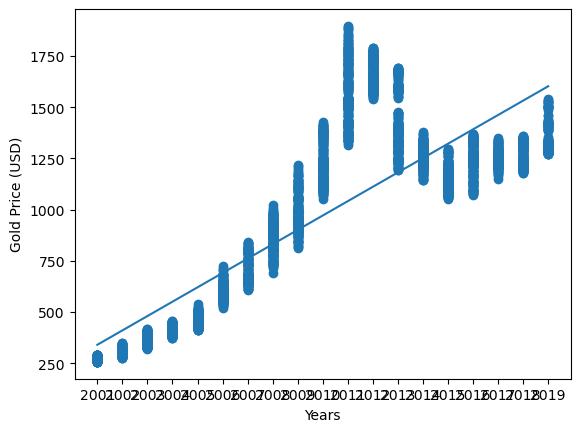

In [24]:
# Creating regression line 
mdl = np.polyfit(df['Year'],df['Price'],1)
regression_line = np.poly1d(mdl)

# plotting the graph with regression line
plt.scatter(df['Year'],df['Price'])
plt.plot(df['Year'],regression_line(df['Year']))
plt.xlabel('Years')
plt.ylabel("Gold Price (USD)")
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 
            2009, 2010, 2011,2012, 2013, 2014, 2015, 2016, 
            2017, 2018, 2019])
plt.show()

### Plot a histplot to find the variation in price

In [1]:
import seaborn as sns
sns.barplot(x = df['Year'],y = df['Price'])
plt.show()

NameError: name 'df' is not defined

### Assign year and price in x and y variables

In [26]:
# we need a 2d array for training the data, since in linear regressio we only take 1 variable, we have to create an array with '[[]]'
X = df[['Year']]
y = df['Price']

In [27]:
X.head()

,Year
0,2001
1,2001
2,2001
3,2001
4,2001


In [28]:
y.head()

0    272.80
1    269.00
2    268.75
3    268.00
4    268.60
Name: Price, dtype: float64

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [29]:
# import train_test split
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

In [31]:
print (X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3302, 1)
(3302,)
(1416, 1)
(1416,)


In [32]:
X_train. head()


,Year
683,2003
2119,2009
4615,2019
662,2003
4159,2017


## Train Data

In [33]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
print(lr.coef_)
print(lr.intercept_)

[70.17366927]
-140074.3237477938


In [37]:
y_pred = lr.predict(X_test)

In [38]:
y_pred

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

### Train the  model

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

### Check the score of our model

In [40]:
lr.score(X_train, y_train)

0.7048691960223057

In [41]:
lr.coef_


array([70.17366927])

### Check the coefficient and Intercept

In [43]:
lr.intercept_

-140074.3237477938

### Make Prediction with Test data

In [46]:
y_pred = lr.predict(X_test)

In [47]:
y_pred

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [48]:
y_pred.shape

(1416,)

In [49]:
y_test.shape


(1416,)

In [50]:
X_test.shape

(1416, 1)

In [51]:
y_test

962      425.50
403      307.80
3220    1335.75
1588     687.25
2065     924.75
         ...   
2237    1088.00
3262    1250.75
2817    1776.50
252      276.50
4441    1222.05
Name: Price, Length: 1416, dtype: float64

In [52]:
data =  {'test' : y_test,'prediction' : y_pred }
df2= pd.DataFrame(data, index = X_test["Year"])
df2

,test,prediction
Year,,
2004,773.5,553.709468
2002,NaN,413.362129
2013,NaN,1185.272491
2007,NaN,764.230476
2009,NaN,904.577814
...,...,...
2009,NaN,904.577814
2013,NaN,1185.272491
2012,NaN,1115.098822


In [53]:
pd.DataFrame(y_pred)

,0
0,553.709468
1,413.362129
2,1185.272491
3,764.230476
4,904.577814
...,...
1411,904.577814
1412,1185.272491
1413,1115.098822
1414,343.188460


### Check the mean absolute error, mean square error

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
mean_absolute_error(y_test,y_pred)

186.2427389387351

In [57]:
# Mean squared error
mean_squared_error(y_test,y_pred)

58032.97376893088

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [64]:
d ={'Year':[2025, 2026, 2027, 2028, 2030]}

In [65]:
df3 = pd.DataFrame(d)

In [66]:
df3

,Year
0,2025
1,2026
2,2027
3,2028
4,2030


In [70]:
o = lr.predict(df3)

In [71]:
pd.DataFrame({'price':o},index = df3["Year"])

,price
Year,
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869


***

# Saravana Perumal R.
#### Saravanaperumalr14@gmail.com